# SJ Price Algorithm

This notebook creates a price algorithm for Saint James hostel that takes into account current demand over a 3 day period and includes the following adjustable parameters: 1) base rate, 2) elasticity, 3) time penalty (the declining importance of each subsequent day), 4) weekend multiplier, and 5) floor ratio. 

## Algorithm

[1]
$$
EA_{𝑖} = (1-(\frac{S_{𝑖}}{C}))*E
$$

<br/>

Where... 
* EA = elasticity ajusted rate
* S = space (number of beds left)
* C = capacity (total number of beds)
* E = elasticity (the rate at which the price fluctuates - with 1 as the average)

<br/>
<br/>

[2]
$$
DA_{𝑖} = \frac{EA_{𝑖} + (EA_{𝑖+1}*T_{1}) + ... + (EA_{𝑖+N}*T_{N})}{1+ T_{1} + ... + T_{N}}
$$

<br/>

Where... 
* DA = days ajusted rate
* N = number of future days to take into account
* T = time penalty (how much less important each additional day is than the one before - as a proportion)


<br/>
<br/>

[3]

$$
WA_{𝑖} = \begin{cases} DA_{𝑖}*W, & \text{ if } D_{𝑖}=(Friday|Saturday)\\ DA_{𝑖}, & \text{ otherwise }\end{cases}
$$

<br/>
<br/>

Where... 
* WA = weekend ajusted rate
* { = conditional value assignment
* D = day of the week
* W = weekend multiplier (e.g. 1.5 if 50% more than weekday rates)

<br/>
<br/>

[4]
$$
P_{𝑖} = \begin{cases} WA_{𝑖}*B, & \text{ if } WA_{𝑖} > F\\F*B, & \text{ otherwise } \end{cases}
$$

Where... 
* P = final price
* B = base price
* F = floor ratio (a fraction of the base price - e.g. 0.75 would be 75% of the base price)


<br/>

## Adjustable parameters

    * E = elasticity
    * T = time penalty
    * W = weekend multiplier
    * F = floor ratio
    * B = base rate

## Simulations

A series of simulations are run on example data for the 8 bedroom mixed dorm to see how adjusting the parameters wouuld affect the price.

### Import libraries

In [1]:
# imports key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Define functions

In [2]:
# calculates a set of prices based on space and day of the week
def calc_prices(S, D, C, B, E, T, W, F):
    # loops through each day to get a price
    prices = []
    for i in range(len(S)-2):
        
        # elasticity adjusted rate
        EA = (1-(S[i] / C )) * E
        
        # days adjusted rate
        DA = EA + ((((1-(S[i+1]/C))*E) * T) + (((1-(S[i+2]/C))*E) * (T*T))) / (1 + T + (T*T))
        
        # weekend adjusted rate
        if D[i] in ['Friday', 'Saturday']:
            WA = DA * W
        else:
            WA = DA
            
        # floor adjusted rate
        if WA < F:
            FA = F
        else:
            FA = WA
            
        # final price
        prices.append( round(FA*B, 1) )
        
    return prices

# returns a simple line plot
def line_plot(prices, title='', color='tab:blue'):
    s_strings = [str(x) for x in S[0:len(S)-2]]
    plt.plot(s_strings, prices, color=color);
    plt.title(title, fontsize=18);
    plt.xlabel('Space', fontsize=14);
    plt.ylabel('Price', fontsize=14);
    plt.xticks(fontsize=8);
    plt.yticks(fontsize=8);
    plt.show();
    
# returns a subplot of line graphs to see how changing paramter values affects the price
def params_plot(var, title, color):
    # determines the parameter to vary based on first letter of the title
    params = ['S', 'D', 'C', 'B', 'E', 'T', 'W', 'F']
    chosen_param = [i for i, x in enumerate(params) if x == title[0]]
    params[chosen_param[0]] = params[chosen_param[0]] + '[num]'
    
    # defines some variables for the subplots
    length = len(var)
    cols = 3
    rows = int(np.ceil(length / 3))
    
    # creates an object for the space variable
    s_strings = [str(x) for x in S[0:len(S)-2]]
    
    # creates a subplots object
    fig, ax = plt.subplots(rows, cols, figsize=(15,9))
    fig.tight_layout(pad=5);
    fig.suptitle(title, y=1.025, fontsize=25);
    
    # loops through each variation in the parameter values 
    for i in range(rows):
        for j in range(cols):
            num = (i*rows)+j
            prices = calc_prices(S=eval(params[0]), D=eval(params[1]), C=eval(params[2]), B=eval(params[3]), E=eval(params[4]), T=eval(params[5]), W=eval(params[6]), F=eval(params[7]))
            ax[i, j].plot(s_strings, prices, color=color);
            ax[i, j].set_title(title[0] + ' = ' + str(round(var[num], 1)), fontsize=18);
            ax[i,j].set_xlabel('Space left', fontsize=14);
            ax[i,j].set_ylabel('Price', fontsize=14);
            ax[i,j].tick_params(axis='both', which='minor', labelsize=8)

### Initial parameters

We can see from the initial parameter settings that the price declines rapidly after more than 2 beds become available - with only the weekend multiplier raising prices slightly after hitting the floor price at 6 beds. This shows us that we should alter the parameters to achieve greater variability in our pricing.

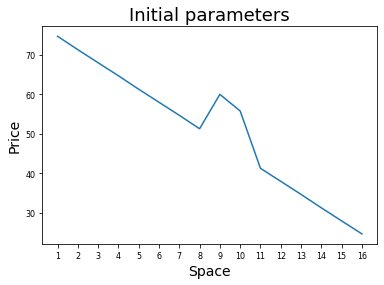

In [11]:
# space (beds left over a 2 week period)
S = range(1,19)

# day (whether a weekend or not)
D = ['Sunday', 'Monday', 'Tuesday', 'Wednesday'] * 2 + ['Friday', 'Saturday'] +  ['Sunday', 'Monday', 'Tuesday', 'Wednesday'] * 2

# capacity (total beds available)
C = 24

# base price (can be thought of as an average)
B = 40

# elasticity (with 1 as the average)
E = 1.2

# importance of each additonal day compared to the previous
T = 1

# weekend multiplier
W = 1.25

# floor rate (the lowest possible multilier of the base price)
F = 0.5

# calculate prices based on initial params
prices = calc_prices(S, D, C, B, E, T, W, F)

# visualize the results
line_plot(prices, title='Initial parameters')

### Elasticity

Experimenting with different elasticity (E) values between 1 and 2 shows us that an E of 1.5 would give us greater price variability without allowing fluctuations to become so large that potential customers wouldn't ever consider paying. 

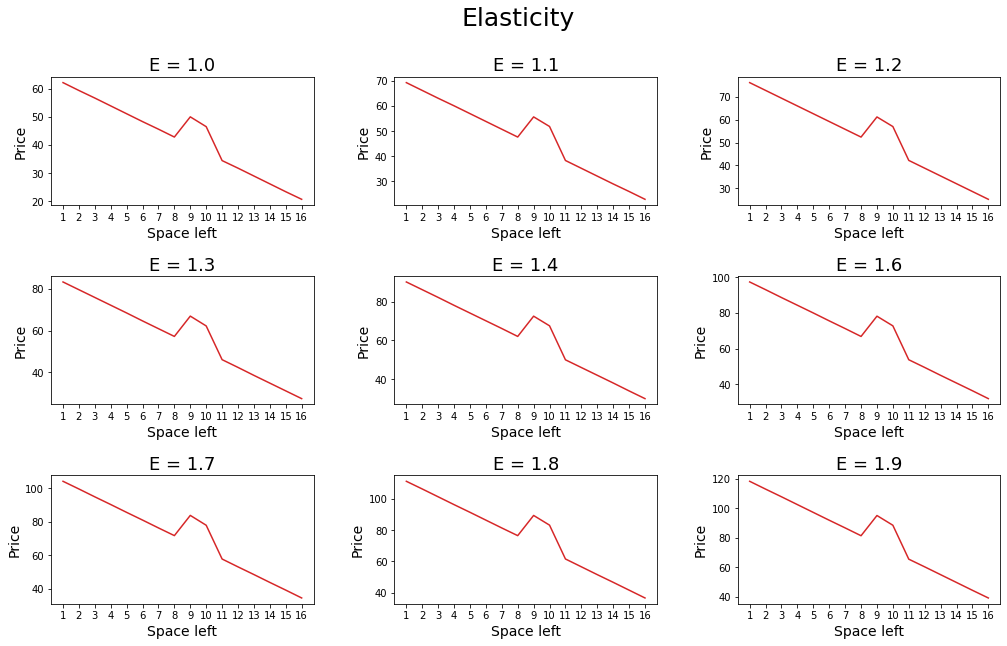

In [12]:
# creates a sequence of different E values to try
E = np.linspace(1, 1.9, 9)

# visualizes the sequence of E values
params_plot(E, 'Elasticity', 'tab:red')

### Time penalty

Investigating the effects of different time penalty values (T) illustrates that a T of 0.7 helps to ensure that busy periods of time as opposed to individual days (such as festivals or events) are reflected in a higher price.

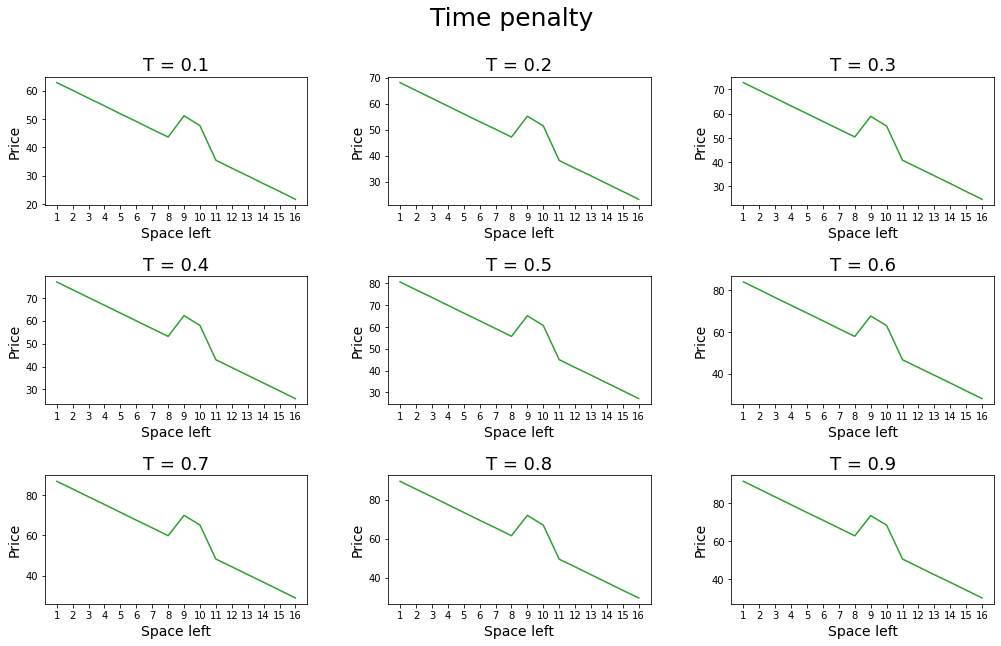

In [13]:
# assigns E the preffered value of 1.5
E = 1.5

# creates a sequence of different E values to try
T = np.linspace(0.1, 0.9, 9)

# visualizes the sequence of E values
params_plot(T, 'Time penalty', 'tab:green')

### Weekend multiplier

Trying out different weekend multiplier (W) values between 1 and 2 demonstrates that a W of 1.5 would likely be sufficient to raise prices enought to compensate for extra demand but not so much as to discourage all potential customers.

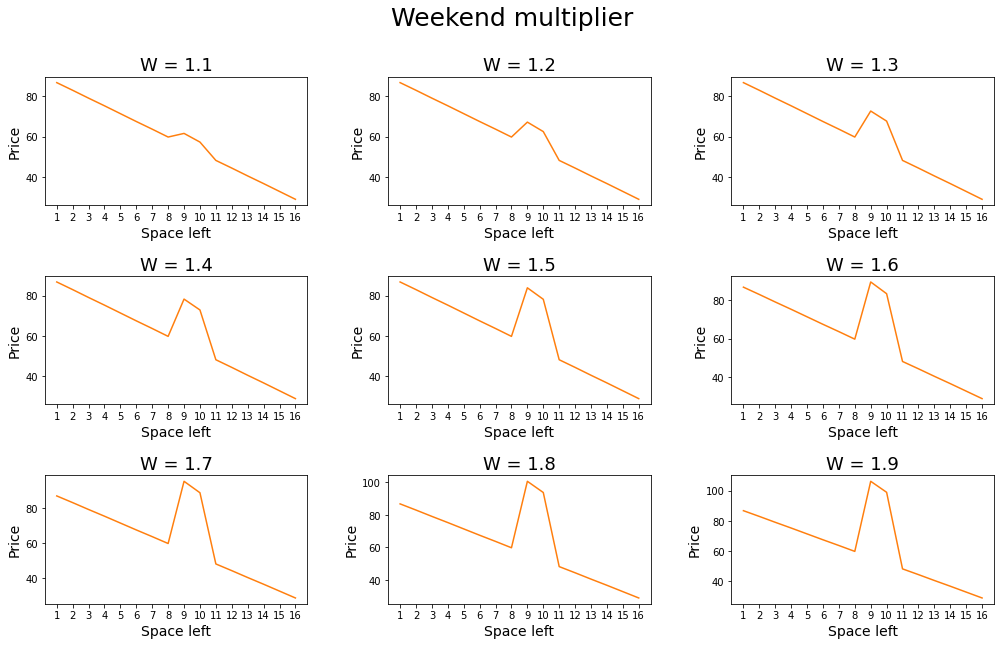

In [14]:
# assigns I the preffered value of 0.7
T = 0.7

# creates a sequence of different W values to try
W = np.linspace(1.1, 1.9, 9)

# visualizes the sequence of W values
params_plot(W, 'Weekend multiplier', 'tab:orange')

### Floor

Testing the impact of different floor ratio (F) values between 0 and 1 tells us that an F of 0.8 would allow us to hit our price floor at around 15 beds (37.5% capacity), allowing us to reduce the price somewhat to encourage demand but without going too low. 

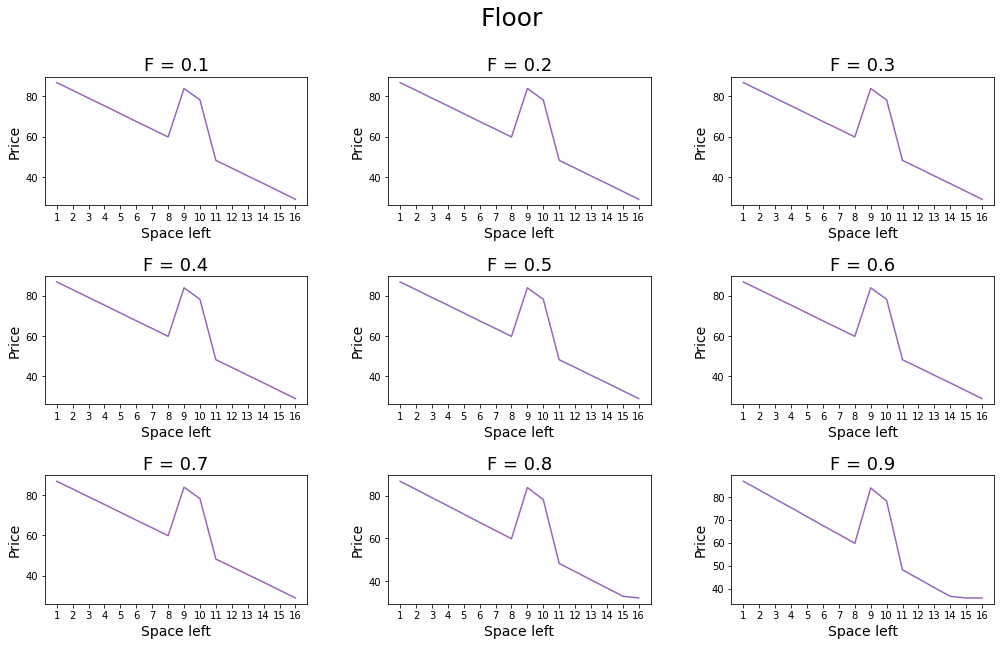

In [15]:
# assigns W the preffered value of 1.5
W = 1.5

# creates a sequence of different FR values to try
F = np.linspace(0.1, 0.9, 9)

# visualizes the sequence of FR values
params_plot(F, 'Floor', 'tab:purple')

### Base price

Trialing different base price (B) values between 10 and 90 tells us that a B of roughly 35 would allow us to charge extra during expeptionally busy times without 1) reaching unthinkably high amounts and 2) allowing the price to drop too low.

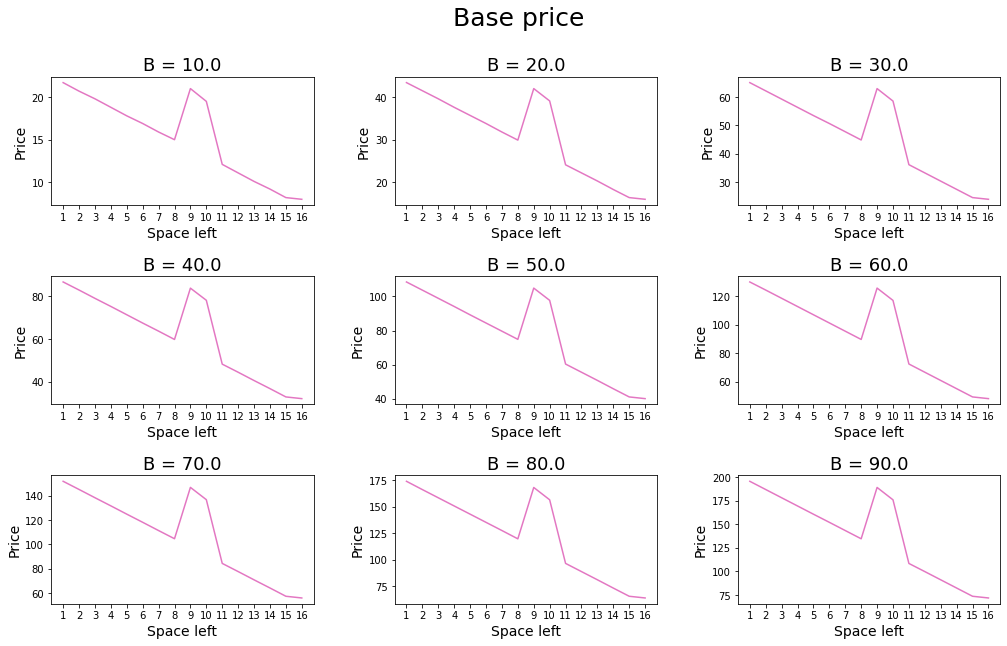

In [21]:
# assigns F the preffered value of 0.8
F = 0.8

# creates a sequence of different FR values to try
B = np.linspace(10, 90, 9)

# visualizes the sequence of FR values
params_plot(B, 'Base price', 'tab:pink')